In [80]:
import pandas as pd

In [90]:
import tensorflow as tf

E:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [133]:
np.ones([5,6])

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

In [143]:
df = pd.DataFrame(np.ones([5,6]),columns = ['A1','B1','C1','A2','B2','C2'])
left_1 = df[['A1','B1','C1']]
right_1 = df[['A2','B2','C2']]

In [155]:
# redefine a new window-motif-mapping
intersect_df = (left_1 + right_1 > 0).astype(int)

In [156]:
for i in range(5):
    df.loc[i+5] = df.loc[i][3:6].tolist() + df.loc[i][:3].tolist() 

In [157]:
left_2 = df[['A1','B1','C1']]
right_2 = df[['A2','B2','C2']]
union_df = left_2.T.dot(right_2)
union_df

,A2,B2,C2
A1,10.0,10.0,10.0
B1,10.0,10.0,10.0
C1,10.0,10.0,10.0


In [159]:
union_df.values - intersect_df.T.dot(intersect_df).values

array([[5., 5., 5.],
       [5., 5., 5.],
       [5., 5., 5.]])

In [124]:
df = pd.DataFrame(columns = ['A1','B1','C1','A2','B2','C2'])
df.loc[0] = [1,1,1,1,1,1]
df.loc[1] = [1,1,0,0,1,1]
df.loc[2] = [0,1,0,1,0,1]
df.loc[3] = [0,0,1,0,0,1]
df.loc[4] = [1,0,0,1,0,1]
df

,A1,B1,C1,A2,B2,C2
0,1,1,1,1,1,1
1,0,1,0,0,1,1
2,0,1,0,1,0,1
3,0,0,1,0,0,1
4,1,0,0,1,0,1


In [167]:
left_df = pd.DataFrame([[1,0,1,1],[0,1,1,1],[0,0,0,0],[0,0,0,1],[0,0,0,1]],columns=['A','B','C','CTCF'])
left_df

,A,B,C,CTCF
0,1,0,1,1
1,0,1,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,1


In [174]:
right_df = pd.DataFrame([[0,1,1,1],[0,0,0,0],[0,0,0,1],[0,0,1,1],[0,0,0,1]],columns=['A','B','C','CTCF'])
right_df

,A,B,C,CTCF
0,0,1,1,1
1,0,0,0,0
2,0,0,0,1
3,0,0,1,1
4,0,0,0,1


In [175]:
mat1 = pd.concat([left_df,right_df])
mat2 = pd.concat([right_df,left_df])
mat1.T.dot(mat2)

,A,B,C,CTCF
A,0,1,1,1
B,1,0,1,1
C,1,1,2,3
CTCF,1,1,3,6


In [172]:
mat1.T

,0,1,2,3,4,0,1,2,3,4
A,1,0,0,0,0,0,0,0,0,0
B,0,1,0,0,0,1,0,0,0,0
C,1,1,0,0,0,0,0,0,1,0
CTCF,1,1,0,1,1,1,0,1,1,1


In [173]:
mat2

,A,B,C,CTCF
0,0,1,0,1
1,0,0,0,0
2,0,0,0,1
3,0,0,1,1
4,0,0,0,1
0,1,0,1,1
1,0,1,1,1
2,0,0,0,0
3,0,0,0,1
4,0,0,0,1


In [176]:
mat3 = ((left_df + right_df ) > 1).astype(int)
mat3.T.dot(mat3)

,A,B,C,CTCF
A,0,0,0,0
B,0,0,0,0
C,0,0,1,1
CTCF,0,0,1,3


,A2,B2,C2
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [139]:
left.T.dot(right)

,A2,B2,C2
A1,10.0,10.0,10.0
B1,10.0,10.0,10.0
C1,10.0,10.0,10.0


In [114]:
df

,A1,B1,C1,A2,B2,C2
0,1,1,1,0,1,0
1,0,1,0,0,1,1
2,0,1,0,1,0,1
3,0,0,1,0,0,1
4,1,0,0,1,0,1
5,0,1,0,1,1,1
6,0,1,1,0,1,0
7,1,0,1,0,1,0
8,0,0,1,0,0,1
9,1,0,1,1,0,0


In [ ]:
left_df = df

In [118]:
test = df.T.dot(df)

In [120]:
(test>0).astype(int)

,A1,B1,C1,A2,B2,C2
A1,1,1,1,1,1,1
B1,1,1,1,1,1,1
C1,1,1,1,1,1,1
A2,1,1,1,1,1,1
B2,1,1,1,1,1,1
C2,1,1,1,1,1,1


In [162]:
test1 = tf.constant(df.values, dtype=tf.int32)

ValueError: Cannot evaluate tensor using `eval()`: No default session is registered. Use `with sess.as_default()` or pass an explicit session to `eval(session=sess)`

In [166]:
with tf.Session() as sess:
    print (test1.eval())
    x = tf.matmul(tf.transpose(test1),test1)
    print (x.eval())
    y = tf.multiply(test1,test1)
    print (y.eval())    

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
[[10 10 10 10 10 10]
 [10 10 10 10 10 10]
 [10 10 10 10 10 10]
 [10 10 10 10 10 10]
 [10 10 10 10 10 10]
 [10 10 10 10 10 10]]
[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]


In [101]:
df2.columns = df.columns
df2

,A1,B1,C1,A2,B2,C2
0,3,1,2,2,1,1
1,1,5,2,1,4,3
2,2,2,6,1,3,2
3,2,1,1,3,1,2
4,1,4,3,1,5,2
5,1,3,2,2,2,6


In [ ]:
tf.transpose
a = tf.constant(a, dtype=tf.float64)

with tf.Session() as sess:
  # they all produce the same result as numpy above
  print(tf.matmul(tf.expand_dims(a,0), w).eval())
  print((tf.reduce_sum(tf.multiply(tf.expand_dims(a,-1), w), axis=0)).eval())
  print((tf.reduce_sum(tf.multiply(a, tf.transpose(w)), axis=1)).eval())

  # Note tf.multiply is equivalent to "*"
  print((tf.reduce_sum(tf.expand_dims(a,-1) * w, axis=0)).eval())
  print((tf.reduce_sum(a * tf.transpose(w), axis=1)).eval())

In [84]:
df.loc[0][3:6]

A2    0
B2    1
C2    0
Name: 0, dtype: object

In [79]:
15959*(31168+15584)/2700000

276.3389511111111

In [30]:
import numpy as np

In [36]:
np.random.binomial(10, 0.1, 1)

array([2])

In [42]:
from scipy.stats import binom_test
from scipy.stats import hypergeom
from scipy.stats import bernoulli 

binom_test(2,5,0.1)

0.08146000000000002

In [67]:
from scipy.stats import binom

In [78]:
binom(2,0.2).sf()

0.0

In [10]:
binom_test(2800,10000,0.2)

8.530465221611321e-82

In [11]:
import scipy.stats as ss
hpd = ss.hypergeom(10000, 3000, 100)
hpd.pmf(10)

1.0665168376808898e-06

In [43]:
np.random.binomial(1, 0.3, 100)

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [49]:
def simulation(k=100,x,y):
    P = np.random.binomial(1, 0.3, k)
    N = np.random.binomial(1, 0.2, k)
    P_cov = float(sum(P))/k
    N_cov = float(sum(N))/k
    return P_cov-N_cov

In [123]:
864/622

1.3890675241157557

In [38]:
import matplotlib
%matplotlib inline

0.05992653836156398


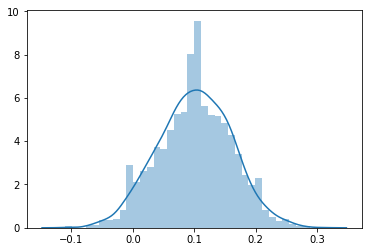

In [56]:
import seaborn as sns
samples = list(map(lambda x:simulation(),range(3000)))
print (np.std(samples))
sns.distplot(samples)

In [59]:
from scipy.stats import norm 
scipy.stats.norm(0, 1).cdf(0)

In [65]:
norm(0.1,0.06).sf(-0.1)

0.9995709396668032

In [29]:

hypergeom.sf(30-1, 30000, 3000, 100)

2.274668167214291e-08

In [46]:
df = pd.DataFrame(columns = ['a','b','c'])

In [47]:
my_dict = {}
my_dict['a'] = 1
my_dict['b'] = 3
my_dict['c'] = 1
df.loc[0] = my_dict
df

,a,b,c
0,1,3,1


In [45]:
df.loc[0] = 
df

,a,b,c
0,1,1,1


In [79]:
a=['s','s','a']
a.remove('s')
a

['s', 'a']

In [44]:
df[['a','c']].loc[1] = [1,1]
df

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,a,b,c


In [58]:
a=['mm9.BARX1_MOUSE.H11MO.0.C%%mm9.EGR1_MOUSE.H11MO.0.A', 'mm9.RUNX3_MOUSE.H11MO.0.A%%mm9.PBX1_MOUSE.H11MO.0.A', 'mm9.ZIC2_MOUSE.H11MO.0.C%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.NR1H4_MOUSE.H11MO.0.A', 'mm9.SP2_MOUSE.H11MO.0.B%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.PITX1_MOUSE.H11MO.0.C%%mm9.PPARA_MOUSE.H11MO.0.A', 'mm9.KLF6_MOUSE.H11MO.0.B%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.ZBT17_MOUSE.H11MO.0.A%%mm9.HNF1A_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.TAF1_MOUSE.H11MO.0.A', 'mm9.ZBT17_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.DLX5_MOUSE.H11MO.0.C%%mm9.MSGN1_MOUSE.H11MO.0.C', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.BARX1_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.PBX3_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.FOXI1_MOUSE.H11MO.0.B%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.NOBOX_MOUSE.H11MO.0.C%%mm9.EGR1_MOUSE.H11MO.0.A', 'mm9.FOXK1_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.STAT6_MOUSE.H11MO.0.A', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.RELB_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.TF2L1_MOUSE.H11MO.0.C', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.NOBOX_MOUSE.H11MO.0.C%%mm9.PTF1A_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.SPI1_MOUSE.H11MO.0.A', 'mm9.KLF4_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.ETS1_MOUSE.H11MO.0.A%%mm9.THA11_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.COT2_MOUSE.H11MO.0.A', 'mm9.NKX22_MOUSE.H11MO.0.A%%mm9.RORG_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.OLIG2_MOUSE.H11MO.0.A', 'mm9.ERR2_MOUSE.H11MO.0.A%%mm9.CRX_MOUSE.H11MO.0.A', 'mm9.HNF1A_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.PITX1_MOUSE.H11MO.0.C%%mm9.SPI1_MOUSE.H11MO.0.A', 'mm9.ETS1_MOUSE.H11MO.0.A%%mm9.EGR1_MOUSE.H11MO.0.A', 'mm9.MSGN1_MOUSE.H11MO.0.C%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.MAZ_MOUSE.H11MO.0.A', 'mm9.STA5A_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.GABPA_MOUSE.H11MO.0.A%%mm9.NFIC_MOUSE.H11MO.0.A', 'mm9.PBX2_MOUSE.H11MO.0.C%%mm9.NKX22_MOUSE.H11MO.0.A', 'mm9.ZBT17_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.RUNX1_MOUSE.H11MO.0.A%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.MSGN1_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.ATOH1_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.PO5F1_MOUSE.H11MO.0.A', 'mm9.STA5A_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.RUNX3_MOUSE.H11MO.0.A%%mm9.HNF1A_MOUSE.H11MO.0.A', 'mm9.PBX3_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.RUNX3_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.PO5F1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.P73_MOUSE.H11MO.0.B%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.RELB_MOUSE.H11MO.0.C%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.NOBOX_MOUSE.H11MO.0.C%%mm9.MAZ_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.NFYB_MOUSE.H11MO.0.A', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.RUNX3_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.STA5A_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.STA5A_MOUSE.H11MO.0.A', 'mm9.GABPA_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.PO5F1_MOUSE.H11MO.0.A%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.AIRE_MOUSE.H11MO.0.C%%mm9.PO5F1_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.COT2_MOUSE.H11MO.0.A', 'mm9.SOX3_MOUSE.H11MO.0.C%%mm9.HNF1A_MOUSE.H11MO.0.A', 'mm9.ERR2_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.RUNX3_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.EGR1_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.NFYB_MOUSE.H11MO.0.A', 'mm9.HNF1A_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.THA11_MOUSE.H11MO.0.B', 'mm9.HEN1_MOUSE.H11MO.0.C%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.ERR2_MOUSE.H11MO.0.A%%mm9.FOXA1_MOUSE.H11MO.0.A', 'mm9.GABPA_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.SOX3_MOUSE.H11MO.0.C%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.PPARA_MOUSE.H11MO.0.A', 'mm9.KLF4_MOUSE.H11MO.0.A%%mm9.BARX1_MOUSE.H11MO.0.C', 'mm9.IRF4_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.RUNX3_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.HNF1A_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.IRF4_MOUSE.H11MO.0.A', 'mm9.PBX3_MOUSE.H11MO.0.A%%mm9.RUNX3_MOUSE.H11MO.0.A', 'mm9.PBX2_MOUSE.H11MO.0.C%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.PBX2_MOUSE.H11MO.0.C%%mm9.HNF4G_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.ZIC2_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.NFIC_MOUSE.H11MO.0.A', 'mm9.RUNX3_MOUSE.H11MO.0.A%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.HEN1_MOUSE.H11MO.0.C%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.MSGN1_MOUSE.H11MO.0.C', 'mm9.DLX5_MOUSE.H11MO.0.C%%mm9.FOXI1_MOUSE.H11MO.0.B', 'mm9.NFIC_MOUSE.H11MO.0.A%%mm9.AIRE_MOUSE.H11MO.0.C', 'mm9.KLF4_MOUSE.H11MO.0.A%%mm9.FOXA1_MOUSE.H11MO.0.A', 'mm9.NFYB_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.PPARA_MOUSE.H11MO.0.A', 'mm9.TBX20_MOUSE.H11MO.0.C%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.NR1I3_MOUSE.H11MO.0.C%%mm9.IRF4_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.ZN143_MOUSE.H11MO.0.A', 'mm9.NFYB_MOUSE.H11MO.0.A%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.PO5F1_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.MSGN1_MOUSE.H11MO.0.C', 'mm9.HSF2_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.MAZ_MOUSE.H11MO.0.A%%mm9.PRRX2_MOUSE.H11MO.0.C', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.EGR1_MOUSE.H11MO.0.A', 'mm9.ERR2_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.AIRE_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.NKX22_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.E2F6_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.GFI1_MOUSE.H11MO.0.C', 'mm9.HSF2_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.GABPA_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.JUNB_MOUSE.H11MO.0.A%%mm9.NKX22_MOUSE.H11MO.0.A', 'mm9.HNF1A_MOUSE.H11MO.0.A%%mm9.EGR1_MOUSE.H11MO.0.A', 'mm9.GABPA_MOUSE.H11MO.0.A%%mm9.RUNX3_MOUSE.H11MO.0.A', 'mm9.NFIC_MOUSE.H11MO.0.A%%mm9.PO5F1_MOUSE.H11MO.0.A', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.IRF4_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.MSGN1_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.RORG_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.TBX20_MOUSE.H11MO.0.C', 'mm9.PBX2_MOUSE.H11MO.0.C%%mm9.IRF4_MOUSE.H11MO.0.A', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.NR1D2_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.ZIC2_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.PAX5_MOUSE.H11MO.0.A', 'mm9.MEIS1_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.BARX1_MOUSE.H11MO.0.C', 'mm9.SOX3_MOUSE.H11MO.0.C%%mm9.PDX1_MOUSE.H11MO.0.B', 'mm9.NFYB_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.NDF2_MOUSE.H11MO.0.A%%mm9.FOXA1_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.MSGN1_MOUSE.H11MO.0.C%%mm9.HNF1A_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.MAF_MOUSE.H11MO.0.A', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.ZN143_MOUSE.H11MO.0.A', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.NF2L2_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.SOX3_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.HSF2_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.ASCL1_MOUSE.H11MO.0.A', 'mm9.KLF4_MOUSE.H11MO.0.A%%mm9.NFYB_MOUSE.H11MO.0.A', 'mm9.SRY_MOUSE.H11MO.0.B%%mm9.RELB_MOUSE.H11MO.0.C', 'mm9.ERR2_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.NR1D2_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.NR1H4_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.MSGN1_MOUSE.H11MO.0.C%%mm9.NFYB_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.PTF1A_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.SOX3_MOUSE.H11MO.0.C%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.SRBP2_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.PDX1_MOUSE.H11MO.0.B', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.RORG_MOUSE.H11MO.0.B', 'mm9.ETS1_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.WT1_MOUSE.H11MO.0.B%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.COT2_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.TBX20_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.IRF4_MOUSE.H11MO.0.A%%mm9.PDX1_MOUSE.H11MO.0.B', 'mm9.PRDM9_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.SP1_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.KLF4_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.JUNB_MOUSE.H11MO.0.A%%mm9.NFIC_MOUSE.H11MO.0.A', 'mm9.GABPA_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.NFIC_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.ZBT17_MOUSE.H11MO.0.A', 'mm9.MSGN1_MOUSE.H11MO.0.C%%mm9.THA11_MOUSE.H11MO.0.B', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.IRF4_MOUSE.H11MO.0.A', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.CEBPA_MOUSE.H11MO.0.A', 'mm9.SOX3_MOUSE.H11MO.0.C%%mm9.ETS1_MOUSE.H11MO.0.A', 'mm9.RORG_MOUSE.H11MO.0.B%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.ERR3_MOUSE.H11MO.0.C%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.ZBT17_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.NOBOX_MOUSE.H11MO.0.C%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.GFI1_MOUSE.H11MO.0.C', 'mm9.DLX5_MOUSE.H11MO.0.C%%mm9.IRF4_MOUSE.H11MO.0.A', 'mm9.NKX32_MOUSE.H11MO.0.B%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.FOXI1_MOUSE.H11MO.0.B%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.DLX5_MOUSE.H11MO.0.C', 'mm9.NKX32_MOUSE.H11MO.0.B%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.FOXI1_MOUSE.H11MO.0.B%%mm9.RUNX3_MOUSE.H11MO.0.A', 'mm9.FOXK1_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.MSGN1_MOUSE.H11MO.0.C%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.STA5A_MOUSE.H11MO.0.A%%mm9.PO5F1_MOUSE.H11MO.0.A', 'mm9.JUNB_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.IRF4_MOUSE.H11MO.0.A%%mm9.PO5F1_MOUSE.H11MO.0.A', 'mm9.PITX1_MOUSE.H11MO.0.C%%mm9.RORA_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.SUH_MOUSE.H11MO.0.A', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.FOXI1_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.WT1_MOUSE.H11MO.0.B', 'mm9.ASCL1_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.NFYB_MOUSE.H11MO.0.A', 'mm9.RUNX1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.ERR3_MOUSE.H11MO.0.C%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.FOXD3_MOUSE.H11MO.0.C%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.PBX1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.STA5A_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.FOXI1_MOUSE.H11MO.0.B', 'mm9.ERR3_MOUSE.H11MO.0.C%%mm9.BARX1_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.NF2L2_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.SP2_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.FOXI1_MOUSE.H11MO.0.B', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.HNF4G_MOUSE.H11MO.0.C', 'mm9.IRF4_MOUSE.H11MO.0.A%%mm9.HNF1A_MOUSE.H11MO.0.A', 'mm9.ERR3_MOUSE.H11MO.0.C%%mm9.SRY_MOUSE.H11MO.0.B', 'mm9.BATF3_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.RORG_MOUSE.H11MO.0.B', 'mm9.RUNX3_MOUSE.H11MO.0.A%%mm9.NFYB_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.NR1H4_MOUSE.H11MO.0.A', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.MSGN1_MOUSE.H11MO.0.C%%mm9.RORG_MOUSE.H11MO.0.B', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.PO5F1_MOUSE.H11MO.0.A', 'mm9.JUNB_MOUSE.H11MO.0.A%%mm9.FOXD3_MOUSE.H11MO.0.C', 'mm9.OLIG2_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.NOBOX_MOUSE.H11MO.0.C%%mm9.THA11_MOUSE.H11MO.0.B', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.MSGN1_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.NKX22_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.SRBP2_MOUSE.H11MO.0.B', 'mm9.RELB_MOUSE.H11MO.0.C%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.PITX1_MOUSE.H11MO.0.C%%mm9.THA11_MOUSE.H11MO.0.B', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.OLIG2_MOUSE.H11MO.0.A', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.ETS1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.PO3F1_MOUSE.H11MO.0.C%%mm9.RELB_MOUSE.H11MO.0.C', 'mm9.NFAC1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'class', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.SP2_MOUSE.H11MO.0.B', 'mm9.NKX22_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.IRF4_MOUSE.H11MO.0.A%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.NFIC_MOUSE.H11MO.0.A%%mm9.RORG_MOUSE.H11MO.0.B', 'mm9.ETS1_MOUSE.H11MO.0.A%%mm9.NKX32_MOUSE.H11MO.0.B', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.RORA_MOUSE.H11MO.0.C', 'mm9.HNF4G_MOUSE.H11MO.0.C%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.FOXA1_MOUSE.H11MO.0.A%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.JUNB_MOUSE.H11MO.0.A%%mm9.RUNX3_MOUSE.H11MO.0.A', 'mm9.NFIC_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.MEF2A_MOUSE.H11MO.0.A%%mm9.TF2L1_MOUSE.H11MO.0.C', 'mm9.CRX_MOUSE.H11MO.0.A%%mm9.NFAC1_MOUSE.H11MO.0.A', 'mm9.EGR1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.DLX5_MOUSE.H11MO.0.C%%mm9.SOX3_MOUSE.H11MO.0.C', 'mm9.GFI1_MOUSE.H11MO.0.C%%mm9.NOBOX_MOUSE.H11MO.0.C', 'mm9.FOXK1_MOUSE.H11MO.0.A%%mm9.PITX1_MOUSE.H11MO.0.C', 'mm9.PBX2_MOUSE.H11MO.0.C%%mm9.MEF2A_MOUSE.H11MO.0.A', 'mm9.BARX1_MOUSE.H11MO.0.C%%mm9.JUNB_MOUSE.H11MO.0.A']

In [77]:
list(map(lambda x:list(map(lambda y:y+"@@@",x.split("%%")))+list(map(lambda y:y+"###",x.split("%%"))),a))

[['mm9.BARX1_MOUSE.H11MO.0.C@@@',
  'mm9.EGR1_MOUSE.H11MO.0.A@@@',
  'mm9.BARX1_MOUSE.H11MO.0.C###',
  'mm9.EGR1_MOUSE.H11MO.0.A###'],
 ['mm9.RUNX3_MOUSE.H11MO.0.A@@@',
  'mm9.PBX1_MOUSE.H11MO.0.A@@@',
  'mm9.RUNX3_MOUSE.H11MO.0.A###',
  'mm9.PBX1_MOUSE.H11MO.0.A###'],
 ['mm9.ZIC2_MOUSE.H11MO.0.C@@@',
  'mm9.NOBOX_MOUSE.H11MO.0.C@@@',
  'mm9.ZIC2_MOUSE.H11MO.0.C###',
  'mm9.NOBOX_MOUSE.H11MO.0.C###'],
 ['mm9.MEF2A_MOUSE.H11MO.0.A@@@',
  'mm9.NR1H4_MOUSE.H11MO.0.A@@@',
  'mm9.MEF2A_MOUSE.H11MO.0.A###',
  'mm9.NR1H4_MOUSE.H11MO.0.A###'],
 ['mm9.SP2_MOUSE.H11MO.0.B@@@',
  'mm9.NOBOX_MOUSE.H11MO.0.C@@@',
  'mm9.SP2_MOUSE.H11MO.0.B###',
  'mm9.NOBOX_MOUSE.H11MO.0.C###'],
 ['mm9.PITX1_MOUSE.H11MO.0.C@@@',
  'mm9.PPARA_MOUSE.H11MO.0.A@@@',
  'mm9.PITX1_MOUSE.H11MO.0.C###',
  'mm9.PPARA_MOUSE.H11MO.0.A###'],
 ['mm9.KLF6_MOUSE.H11MO.0.B@@@',
  'mm9.MEF2A_MOUSE.H11MO.0.A@@@',
  'mm9.KLF6_MOUSE.H11MO.0.B###',
  'mm9.MEF2A_MOUSE.H11MO.0.A###'],
 ['mm9.CRX_MOUSE.H11MO.0.A@@@',
  'mm9.SOX3_MOUSE.H11

In [ ]:
list(map(lambda x:[x.split("%%")[0]+"@@@",x.split("%%")[1]+"@@@",x.split("%%")[0]+"###",x.split("%%")[1]+"###"],a))

In [48]:
df = pd.DataFrame([[1,2,0,1],[0,1,0,1]])
df.columns = ["l1m1","l1m2","l2m1","l2m2"]
df

,l1m1,l1m2,l2m1,l2m2
0,1,2,0,1
1,0,1,0,1


In [54]:
(df.sum() - df.sum())>0

l1m1    False
l1m2    False
l2m1    False
l2m2    False
dtype: bool

In [37]:
np.random.choice([1,2,3,4,5], 60)

array([3, 4, 1, 2, 2, 3, 4, 5, 2, 2, 4, 1, 4, 1, 3, 3, 2, 3, 3, 3, 1, 3,
       5, 2, 2, 4, 3, 1, 4, 5, 2, 5, 5, 3, 1, 2, 1, 2, 3, 5, 1, 1, 5, 2,
       5, 5, 3, 2, 4, 5, 2, 4, 3, 3, 2, 2, 2, 3, 5, 3])

1

In [33]:
(df.l1m1 * df.l2m2).astype(bool) 

0     True
1    False
dtype: bool

In [34]:
(df.l1m2 * df.l2m1).astype(bool)

0    False
1    False
dtype: bool

In [3]:
df.index=["a",'b']
df

,0,1
a,1,2
b,3,4


In [4]:
df.loc[['a','a']]

,0,1
a,1,2
a,1,2


In [7]:
df.reset_index(level=0)

,index,0,1
0,a,1,2
1,b,3,4


In [8]:
pd.concat([df.reset_index(level=0),df.reset_index(level=0)],axis=1)

,index,0,1,index,0,1
0,a,1,2,a,1,2
1,b,3,4,b,3,4


In [9]:
def asd(x,n):
    return x['a'] + 1

In [10]:
df = df.T

In [11]:
df

,a,b
0,1,3
1,2,4


In [16]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

bc = load_breast_cancer()

dfm = pd.DataFrame(bc['data'])
dfm.columns = bc['feature_names']

print(dfm.shape)  # (569, 30)
print(dfm.index)  # RangeIndex(start=0, stop=569, step=1)

(569, 30)
RangeIndex(start=0, stop=569, step=1)


In [17]:
import numpy as np

def split(dfm, chunk_size):
    indices = index_marks(dfm.shape[0], chunk_size)
    return np.split(dfm, indices)

chunks = split(dfm, 100)

NameError: name 'index_marks' is not defined

In [19]:
a = np.array_split(dfm, 7)

In [20]:
a[0]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.18600,0.2750,0.08902
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.16250,0.2364,0.07678
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.20600,0.4378,0.10720
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750
